In [1]:
import pandas as pd

# Load the data from the uploaded file
data_path = 'estonia-passenger-list.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   PassengerId  Country        Firstname  Lastname Sex  Age Category  Survived
 0            1   Sweden      ARVID KALLE     AADLI   M   62        P         0
 1            2  Estonia              LEA   AALISTE   F   22        C         0
 2            3  Estonia             AIRI   AAVASTE   F   21        C         0
 3            4   Sweden             JURI     AAVIK   M   53        C         0
 4            5   Sweden  BRITTA ELISABET  AHLSTROM   F   55        P         0,
 Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
        'Category', 'Survived'],
       dtype='object'))

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Show the summary statistics of the dataset to understand the distribution and spot any potential outliers
summary_statistics = data.describe()

missing_values, summary_statistics


(PassengerId    0
 Country        0
 Firstname      0
 Lastname       0
 Sex            0
 Age            0
 Category       0
 Survived       0
 dtype: int64,
        PassengerId         Age    Survived
 count   989.000000  989.000000  989.000000
 mean    494.992922   44.575329    0.138524
 std     285.643660   17.235146    0.345624
 min       1.000000    0.000000    0.000000
 25%     248.000000   30.000000    0.000000
 50%     495.000000   44.000000    0.000000
 75%     742.000000   59.000000    0.000000
 max     989.000000   87.000000    1.000000)

In [3]:
# Remove the 'Firstname' and 'Lastname' columns from the dataset
data_cleaned = data.drop(['Firstname', 'Lastname'], axis=1)

# Display the updated DataFrame to verify the changes
data_cleaned.head()


,PassengerId,Country,Sex,Age,Category,Survived
0,1,Sweden,M,62,P,0
1,2,Estonia,F,22,C,0
2,3,Estonia,F,21,C,0
3,4,Sweden,M,53,C,0
4,5,Sweden,F,55,P,0


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize the encoders
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

# Label encoding for 'Sex'
data_cleaned['Sex'] = label_encoder.fit_transform(data_cleaned['Sex'])

# One-hot encoding for 'Country'
country_encoded = onehot_encoder.fit_transform(data_cleaned[['Country']])
country_df = pd.DataFrame(country_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))

# Combine the original DataFrame with the new one-hot encoded DataFrame
data_encoded = pd.concat([data_cleaned.drop(['Country'], axis=1), country_df], axis=1)

# Display the updated DataFrame to verify the changes
data_encoded.head()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,...,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,1,1,62,P,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,22,C,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,21,C,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,53,C,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,55,P,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [7]:
data_encoded.dtypes

PassengerId                int64
Sex                        int64
Age                        int64
Category                  object
Survived                   int64
Country_Belarus          float64
Country_Canada           float64
Country_Denmark          float64
Country_Estonia          float64
Country_Finland          float64
Country_France           float64
Country_Germany          float64
Country_Great Britain    float64
Country_Latvia           float64
Country_Lithuania        float64
Country_Morocco          float64
Country_Netherlands      float64
Country_Nigeria          float64
Country_Norway           float64
Country_Russia           float64
Country_Sweden           float64
dtype: object

In [8]:
# Identify the columns that are category types
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

In [9]:
# If category-type data columns exist, code them uniquely hot
if not categorical_columns.empty:
    onehot_encoder = OneHotEncoder(sparse=False)
    categorical_data = onehot_encoder.fit_transform(data_encoded[categorical_columns])
    categorical_df = pd.DataFrame(categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

    # Remove the original category type columns and merge the new solo heat coded columns into the original DataFrame
    data_encoded = pd.concat([data_encoded.drop(categorical_columns, axis=1), categorical_df], axis=1)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
data_encoded.dtypes

PassengerId                int64
Sex                        int64
Age                        int64
Survived                   int64
Country_Belarus          float64
Country_Canada           float64
Country_Denmark          float64
Country_Estonia          float64
Country_Finland          float64
Country_France           float64
Country_Germany          float64
Country_Great Britain    float64
Country_Latvia           float64
Country_Lithuania        float64
Country_Morocco          float64
Country_Netherlands      float64
Country_Nigeria          float64
Country_Norway           float64
Country_Russia           float64
Country_Sweden           float64
Category_C               float64
Category_P               float64
dtype: object

In [11]:
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(random_state=42)
# Train the RandomForest model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set and evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

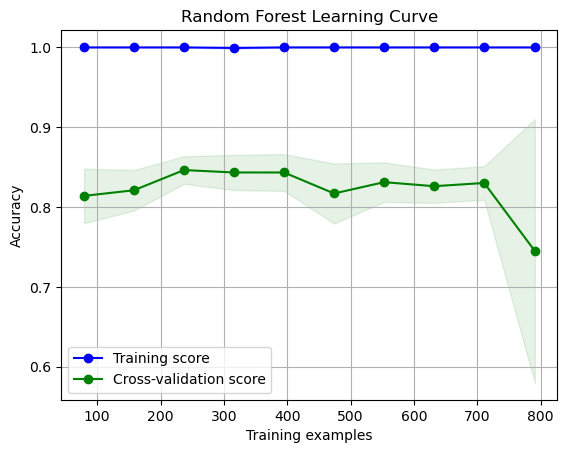

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the training set for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42), 
    X, 
    y, 
    train_sizes=train_sizes, 
    cv=5, 
    scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Mapping the learning curve
plt.figure()
plt.title("Random Forest Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [15]:
rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Reduction in the number of trees
    max_depth=10,      # Limit the maximum depth of the tree
    min_samples_split=10,
    min_samples_leaf=4
)

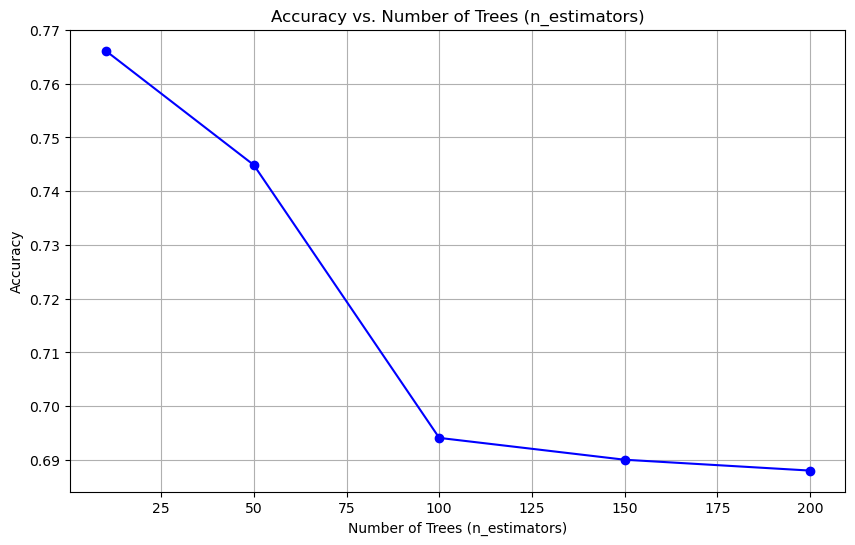

In [16]:
# function is used to adjust the parameters and calculate the cross-validation accuracy of the model
def tune_n_estimators(estimator_range, X, y):
    accuracy_scores = []

    for n_estimators in estimator_range:
        clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # 使用5折交叉验证
        accuracy_scores.append(np.mean(scores))

    return accuracy_scores

# function to plot the effect of n_estimators on accuracy
def plot_n_estimators_vs_accuracy(estimator_range, accuracy_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(estimator_range, accuracy_scores, marker='o', linestyle='-', color='blue')
    plt.title('Accuracy vs. Number of Trees (n_estimators)')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Define the range of n_estimators values to be tested
estimator_range = [10, 50, 100, 150, 200]

# Adjusting parameters and obtaining accuracy scores
accuracy_scores = tune_n_estimators(estimator_range, X, y)

# Mapping of accuracy
plot_n_estimators_vs_accuracy(estimator_range, accuracy_scores)


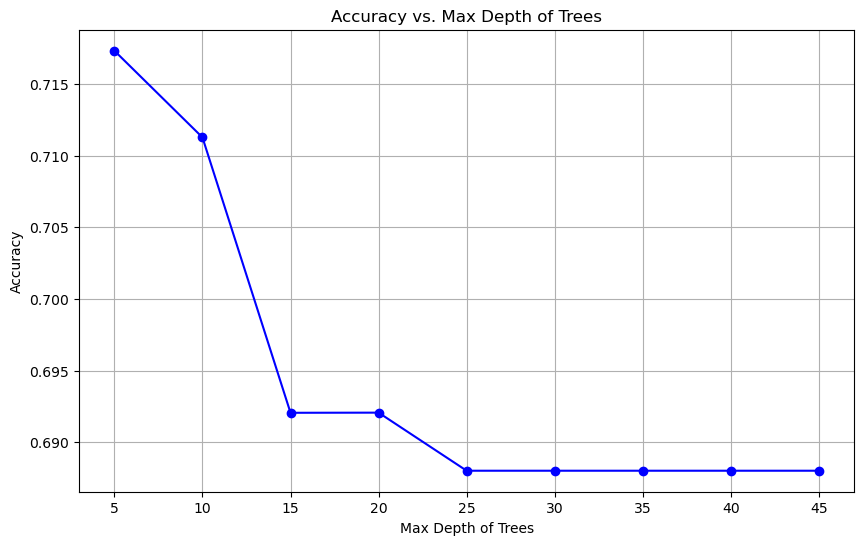

In [17]:
# Parameter tuning function
def tune_max_depth(max_depth_range, X, y):
    accuracy_scores = []

    # Iterate through different max_depth values
    for max_depth in max_depth_range:
        clf = RandomForestClassifier(n_estimators=300, max_depth=max_depth, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # 使用5折交叉验证
        accuracy_scores.append(np.mean(scores))

    return accuracy_scores

# visualisation function
def plot_max_depth_vs_accuracy(max_depth_range, accuracy_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, accuracy_scores, marker='o', linestyle='-', color='blue')
    plt.title('Accuracy vs. Max Depth of Trees')
    plt.xlabel('Max Depth of Trees')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Define the range of max_depth values to be tested
max_depth_range = [5, 10, 15, 20, 25, 30, 35, 40, 45]

# Adjusting parameters and obtaining accuracy scores
accuracy_scores = tune_max_depth(max_depth_range, X, y)

# Mapping of accuracy
plot_max_depth_vs_accuracy(max_depth_range, accuracy_scores)


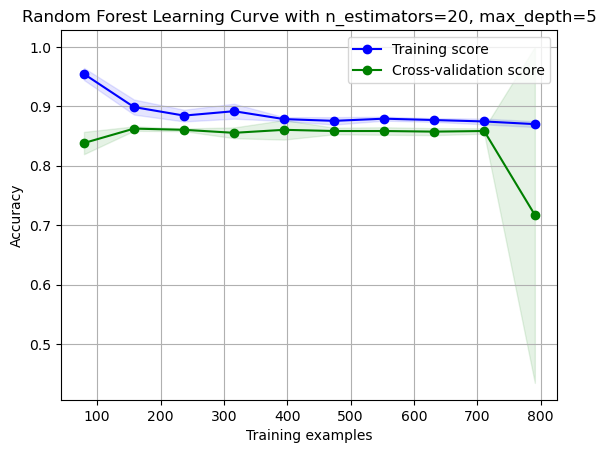

In [18]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Define the size of the training set for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialise the random forest classifier with the specified n_estimators and max_depth parameters
clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X,
    y,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Mapping the learning curve
plt.figure()
plt.title("Random Forest Learning Curve with n_estimators=20, max_depth=5")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [19]:
#accuracy, classification_rep
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       171
           1       0.29      0.15      0.20        27

    accuracy                           0.83       198
   macro avg       0.58      0.54      0.55       198
weighted avg       0.79      0.83      0.81       198



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [21]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

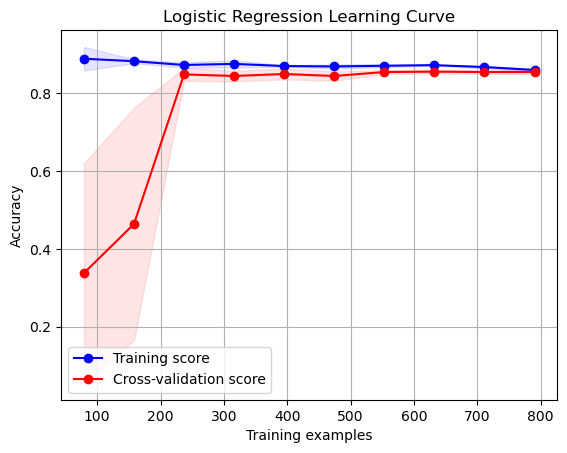

In [22]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, 
    X, 
    y, 
    train_sizes=train_sizes, 
    cv=5, 
    scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Mapping the learning curve
plt.figure()
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="red")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="red", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [23]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       171
           1       0.33      0.04      0.07        27

    accuracy                           0.86       198
   macro avg       0.60      0.51      0.50       198
weighted avg       0.79      0.86      0.81       198



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [25]:
accuracy_scores = []
k_values = range(1, 21)  # K values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"K={k}, Accuracy={accuracy}")

# Find the maximum accuracy and the corresponding K-value
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best K Value: {best_k} with Accuracy: {best_accuracy}")


K=1, Accuracy=0.7676767676767676
K=2, Accuracy=0.8434343434343434
K=3, Accuracy=0.8181818181818182
K=4, Accuracy=0.8585858585858586
K=5, Accuracy=0.8232323232323232
K=6, Accuracy=0.8636363636363636
K=7, Accuracy=0.8535353535353535
K=8, Accuracy=0.8636363636363636
K=9, Accuracy=0.8636363636363636
K=10, Accuracy=0.8636363636363636
K=11, Accuracy=0.8636363636363636
K=12, Accuracy=0.8636363636363636
K=13, Accuracy=0.8585858585858586
K=14, Accuracy=0.8636363636363636
K=15, Accuracy=0.8636363636363636
K=16, Accuracy=0.8636363636363636
K=17, Accuracy=0.8636363636363636
K=18, Accuracy=0.8636363636363636
K=19, Accuracy=0.8636363636363636
K=20, Accuracy=0.8636363636363636
Best K Value: 6 with Accuracy: 0.8636363636363636


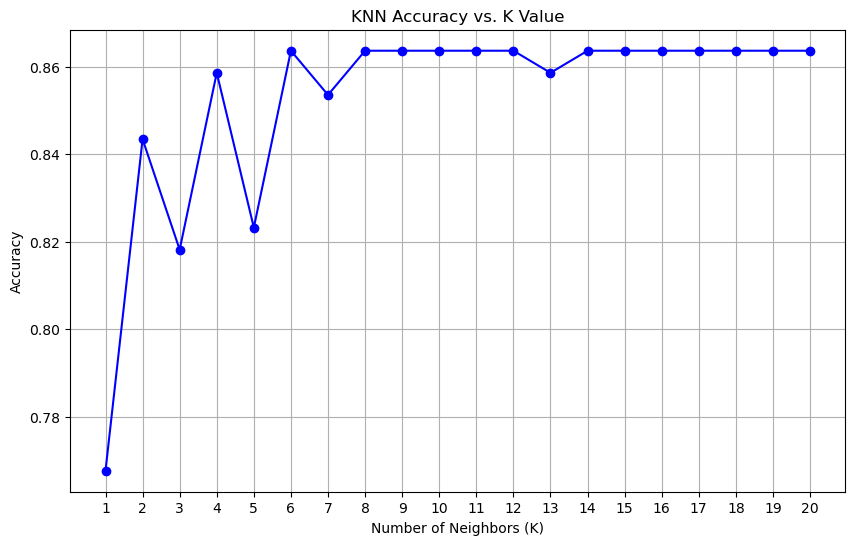

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [27]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

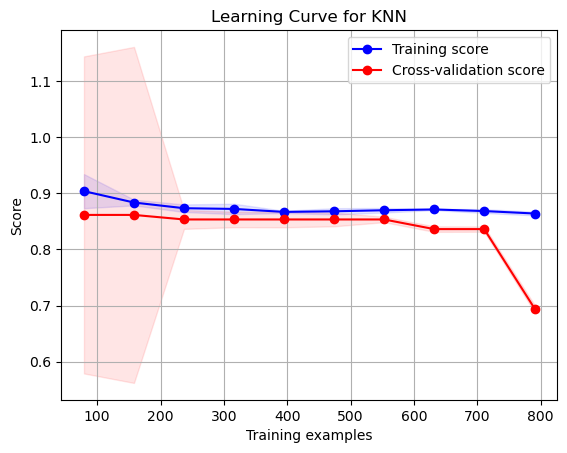

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=best_k),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="red")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.title("Learning Curve for KNN")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [29]:
y_pred_best = knn_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       171
           1       0.00      0.00      0.00        27

    accuracy                           0.86       198
   macro avg       0.43      0.50      0.46       198
weighted avg       0.75      0.86      0.80       198



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [31]:
svc_model = SVC(kernel='linear', probability=True, random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

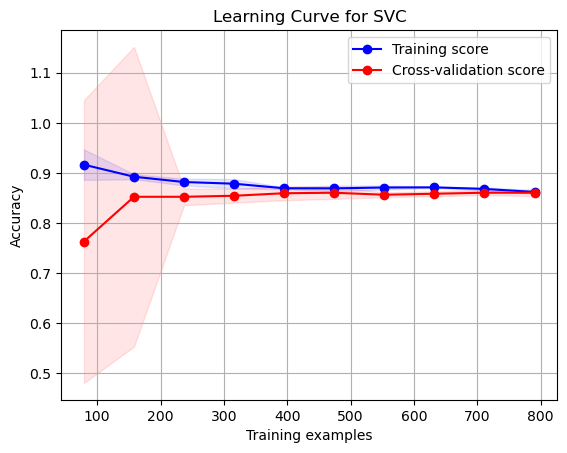

In [32]:
train_sizes, train_scores, test_scores = learning_curve(
    svc_model,
    X,
    y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="red")
plt.title("Learning Curve for SVC")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()


In [33]:
# Forecasting and assessment
y_pred_svc = svc_model.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       171
           1       0.00      0.00      0.00        27

    accuracy                           0.86       198
   macro avg       0.43      0.50      0.46       198
weighted avg       0.75      0.86      0.80       198



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


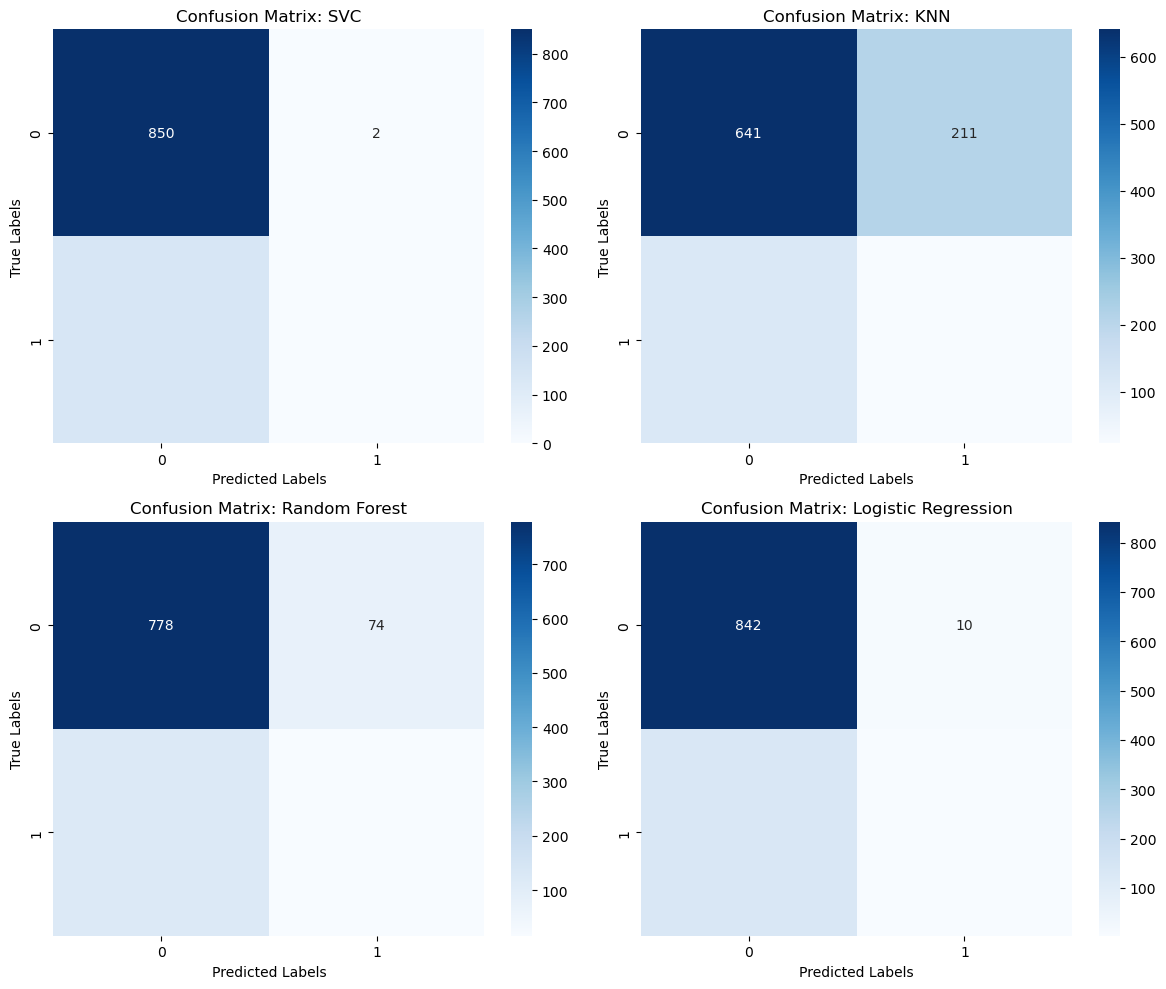

In [35]:
# Initialising the model
models = {
    "SVC": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=best_k),  # 假设 best_k 已经被选择
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Drawing the confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = cross_val_predict(model, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()
